In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from os import listdir

In [2]:
data_path = "brazilian-ecommerce/"
file_names = []
data_dict = {}

In [3]:
for file in listdir(data_path):
    file_names.append(file)

In [4]:
data_dict["customers"] = pd.read_csv(data_path + file_names[0], header=0)
data_dict["geolocation"] = pd.read_csv(data_path + file_names[1], header=0)
data_dict["order_items"] = pd.read_csv(data_path + file_names[2], header=0)
data_dict["order_payments"] = pd.read_csv(data_path + file_names[3], header=0)
data_dict["order_reviews"] = pd.read_csv(data_path + file_names[4], header=0)
data_dict["orders"] = pd.read_csv(data_path + file_names[5], header=0)
data_dict["products"] = pd.read_csv(data_path + file_names[6], header=0)
data_dict["sellers"] = pd.read_csv(data_path + file_names[7], header=0)
data_dict["product_category_name_translation"] = pd.read_csv(data_path + file_names[8], header=0)


In [5]:
payments = data_dict["order_payments"]
payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [23]:
pts = payments["payment_type"].unique()

In [24]:
def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys


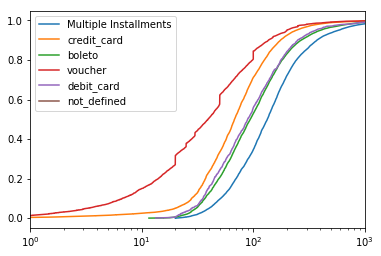

In [55]:
xs, ys = ecdf(payments[payments["payment_installments"] > 1]["payment_value"][payments["payment_type"] == "credit_card"])
plt.plot(xs, ys, label="Multiple Installments")

for pt in pts:
    xs, ys = ecdf(payments[payments["payment_installments"] == 1]["payment_value"][payments["payment_type"] == pt])
    plt.plot(xs, ys, label=pt)
plt.xlim(1,1000)
plt.semilogx()
plt.legend()
plt.show()

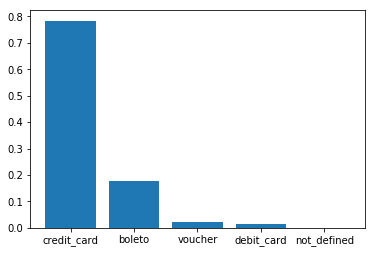

In [50]:
x = payments["payment_type"].unique()
total = np.sum(payments["payment_value"])
y = [np.sum(payments["payment_value"][payments["payment_type"] == xi])/total for xi in x]

plt.bar(x, y)
plt.show()

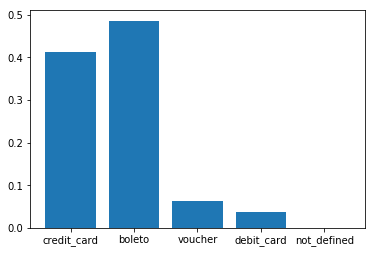

In [51]:
x = payments["payment_type"].unique()
total = np.sum(payments[payments["payment_installments"] == 1]["payment_value"])
y = [np.sum(payments[payments["payment_installments"] == 1]["payment_value"][payments["payment_type"] == xi])/total for xi in x]

plt.bar(x, y)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


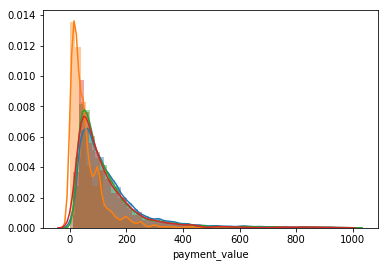

In [70]:
p = payments[payments["payment_value"] < 1000]
sns.distplot(p["payment_value"][p["payment_type"]=="credit_card"])
sns.distplot(p["payment_value"][p["payment_type"]=="voucher"])
sns.distplot(p["payment_value"][p["payment_type"]=="boleto"])
sns.distplot(p["payment_value"][p["payment_type"]=="debit_card"])
plt.show()